Check out the [description](https://github.com/sammitjain/loksabha-questions) for some more context about the datasets. I'm choosing to go with the flattened version for this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
# Load the questions dataset
questions = pd.read_csv("/kaggle/input/lok-sabha-questions/questions_flattened.csv")

In [3]:
# General information
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         7050 non-null   int64 
 1   id                 7050 non-null   int64 
 2   topic              7050 non-null   object
 3   from               7050 non-null   object
 4   to                 7050 non-null   object
 5   contents           7042 non-null   object
 6   date               7050 non-null   object
 7   type               7050 non-null   object
 8   party              7050 non-null   object
 9   state              7050 non-null   object
 10  constituency       7050 non-null   object
 11  constituency_type  1486 non-null   object
dtypes: int64(2), object(10)
memory usage: 661.1+ KB


In [4]:
# Each row stands for a "question". Check out the first 5 rows
questions.head()

,Unnamed: 0,id,topic,from,to,contents,date,type,party,state,constituency,constituency_type
0,0,41,PMGDISHA,"T. Sumathy (A) Thamizhachi Thangapandian, Dr.",ELECTRONICS AND INFORMATION TECHNOLOGY,(a) the State-wise details of rural households...,2021-12-01,STARRED,Dravida Munnetra Kazhagam,Tamil Nadu,Chennai South,NaN
1,1,42,Track Electrification Projects,"Chaudhuri, Km. Debasree",RAILWAYS,(a) whether the Railways proposes to fast trac...,2021-12-01,STARRED,Bharatiya Janata Party,West Bengal,Raiganj,NaN
2,2,43,Mini LPG Cylinders,"Sridhar, Shri Kotagiri",CONSUMER AFFAIRS,(a) whether the Government has received any\np...,2021-12-01,STARRED,Yuvajana Sramika Rythu Congress Party,Andhra Pradesh,Eluru,NaN
3,3,43,Mini LPG Cylinders,"Nallakonda Gari, Shri Reddeppa",CONSUMER AFFAIRS,(a) whether the Government has received any\np...,2021-12-01,STARRED,Yuvajana Sramika Rythu Congress Party,Andhra Pradesh,Chittoor,SC
4,4,44,Container Manufacturing Facility,"Madhav, Shri Kuruva Gorantla",RAILWAYS,(a) whether the Government is aware of the fac...,2021-12-01,STARRED,Yuvajana Sramika Rythu Congress Party,Andhra Pradesh,Hindupur,NaN


In [5]:
# Check number of rows and columns
print(f"There are {questions.shape[0]} rows and {questions.shape[1]} columns in this dataset")

There are 7050 rows and 12 columns in this dataset


In [6]:
# But these are not all unique questions. Check how many unique questions were presented
print(f"A total of {questions.id.unique().shape[0]} unique questions were asked in the Lok Sabha from {questions.date.min()} to {questions.date.max()}")

A total of 4250 unique questions were asked in the Lok Sabha from 2021-12-01 to 2021-12-23


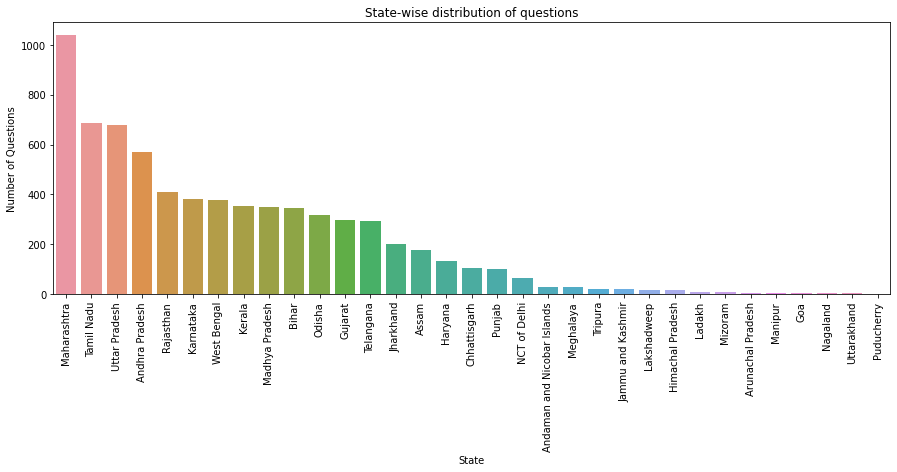

In [7]:
# Let's find out which state's MPs have been the most active
questions_state_wise = questions.groupby('state')['state'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_state_wise.columns = ['State', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('State-wise distribution of questions')
sns.barplot(x='State', y='Number of Questions', data=questions_state_wise)
plt.xticks(rotation=90)
plt.show()

In [8]:
# Are bigger states therefore more "active" in asking questions in the Lok Sabha?
# Not quite. Recall that not each state has an equal number of representatives in the Lok Sabha.
# Let's try to calculate the activity score of a state as : Number of questions from the state / Number of constituencies in the state

# Load members state, constituency info
members = pd.read_csv("/kaggle/input/lok-sabha-questions/members.csv")

# Find number of members from each State
state_counts = members.groupby('State')['State'].count().to_dict()

# Map state_counts to questions_state_wise
questions_state_wise['Number of MPs'] = questions_state_wise['State'].map(state_counts)

# Check out state wise questions now
questions_state_wise.head()

,State,Number of Questions,Number of MPs
0,Maharashtra,1038,48
1,Tamil Nadu,685,39
2,Uttar Pradesh,677,80
3,Andhra Pradesh,571,25
4,Rajasthan,410,25


In [9]:
questions_state_wise['State MP Activity Score'] = questions_state_wise['Number of Questions'] / questions_state_wise['Number of MPs']
questions_state_wise.head()

,State,Number of Questions,Number of MPs,State MP Activity Score
0,Maharashtra,1038,48,21.625000
1,Tamil Nadu,685,39,17.564103
2,Uttar Pradesh,677,80,8.462500
3,Andhra Pradesh,571,25,22.840000
4,Rajasthan,410,25,16.400000


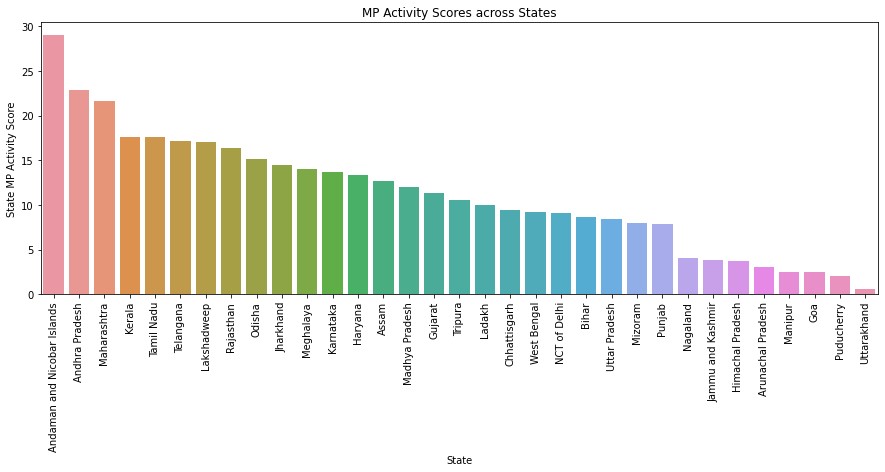

In [10]:
# Let's finally find out which state's MPs have been the most active
questions_state_wise = questions_state_wise.sort_values('State MP Activity Score', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('MP Activity Scores across States')
sns.barplot(x='State', y='State MP Activity Score', data=questions_state_wise)
plt.xticks(rotation=90)
plt.show()

In [11]:
# What's up with Andaman and Nicobar Islands?
questions[questions['state']=='Andaman and Nicobar Islands'][['id', 'from', 'to', 'topic']]

,id,from,to,topic
109,491,"Sharma, Shri Kuldeep Rai",CONSUMER AFFAIRS,Data on Edible Oil
148,517,"Sharma, Shri Kuldeep Rai",RAILWAYS,Enhance Freight Earnings
244,592,"Sharma, Shri Kuldeep Rai",ELECTRONICS AND INFORMATION TECHNOLOGY,Digital Villages
399,671,"Sharma, Shri Kuldeep Rai",TEXTILES,Comprehensive Handloom Cluster Development\nSc...
504,703,"Sharma, Shri Kuldeep Rai",PETROLEUM AND NATURAL GAS,Pradhan Mantri Ujjwala Yojana (PMUY)
568,734,"Sharma, Shri Kuldeep Rai",CIVIL AVIATION,Krishi UDAN 2.0 Scheme
923,927,"Sharma, Shri Kuldeep Rai",WOMEN AND CHILD DEVELOPMENT,Global Hunger Index 2021
1116,991,"Sharma, Shri Kuldeep Rai",HEALTH AND FAMILY WELFARE,Zika Virus
1336,1117,"Sharma, Shri Kuldeep Rai",HEALTH AND FAMILY WELFARE,COVID-19 Deaths in First and Second wave
1535,1187,"Sharma, Shri Kuldeep Rai",EDUCATION,Total Literacy


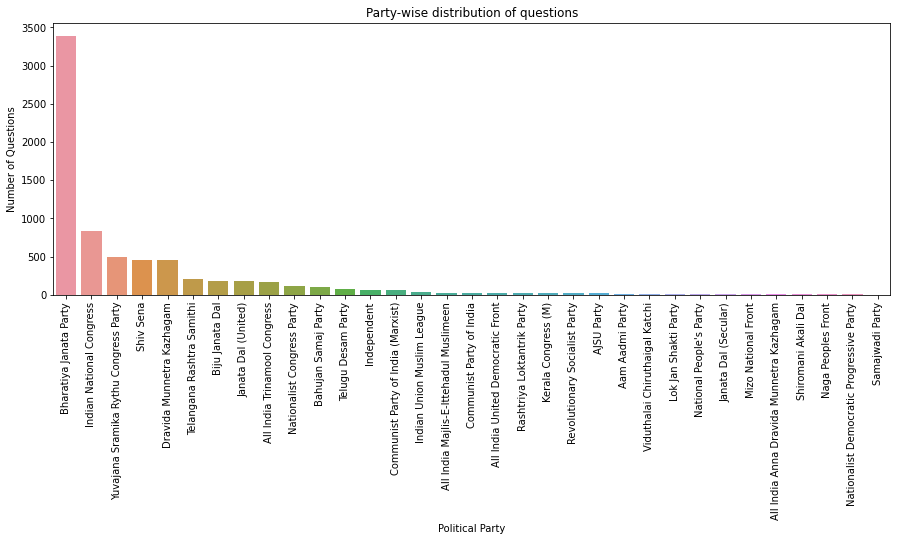

In [12]:
# Considering the political affiliation of the MPs, how many questions were contributed by members from a particular party?
questions_party_wise = questions.groupby('party')['party'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_party_wise.columns = ['Political Party', 'Number of Questions']
plt.figure(figsize=(15, 5))
plt.title('Party-wise distribution of questions')
sns.barplot(x='Political Party', y='Number of Questions', data=questions_party_wise)
plt.xticks(rotation=90)
plt.show()

In [13]:
# This graph isn't surprising. Need to formulate a Party MP Activity Score for better insights
# Find number of members from each Party
party_counts = members.groupby('Party')['Party'].count().to_dict()

# Map party_counts to questions_party_wise
questions_party_wise['Number of MPs'] = questions_party_wise['Political Party'].map(party_counts)

# Check out party wise questions now
questions_party_wise.head()

,Political Party,Number of Questions,Number of MPs
0,Bharatiya Janata Party,3391,301
1,Indian National Congress,838,53
2,Yuvajana Sramika Rythu Congress Party,500,22
3,Shiv Sena,459,19
4,Dravida Munnetra Kazhagam,450,24


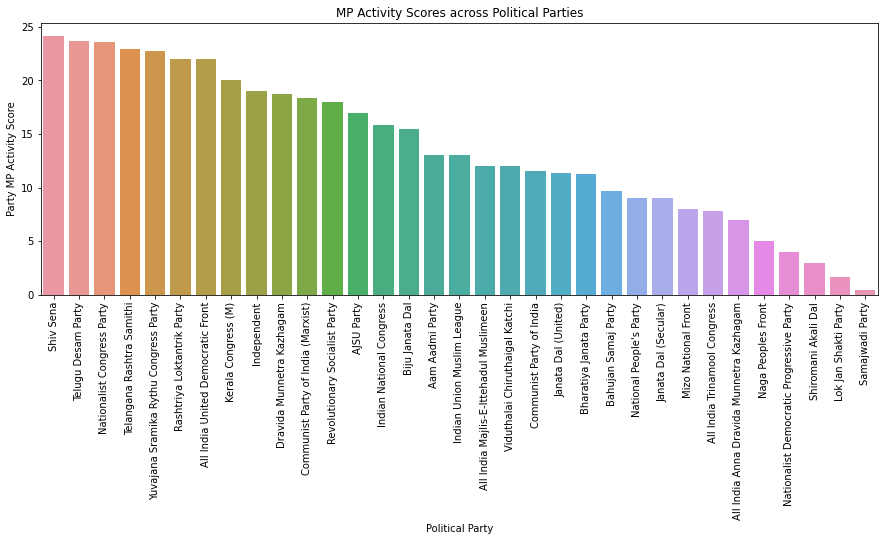

In [14]:
# Calculate Party MP Activity Score
questions_party_wise['Party MP Activity Score'] = questions_party_wise['Number of Questions'] / questions_party_wise['Number of MPs']

# Let's finally find out which party's MPs have been the most active
questions_party_wise = questions_party_wise.sort_values('Party MP Activity Score', ascending=False)
plt.figure(figsize=(15, 5))
plt.title('MP Activity Scores across Political Parties')
sns.barplot(x='Political Party', y='Party MP Activity Score', data=questions_party_wise)
plt.xticks(rotation=90)
plt.show()

## The curious case of Shri Sunil Kumars
* Mapping the Asking Member to an actual Member of Parliament was a difficult task. For e.g., consider the following names:
  - Shri Sunil Kumar Singh
  - Shri S.K. Singh
  - Shri Sunil Singh
  - *Singh, Shri Sunil Kumar*
  - Singh, Sunil Kumar
  - Singh, Sunil K.
* These are all valid ways to write a name. Which one do we stick to? I choose to go with the full name approach with Last Name, First Name. Fuzzy-matching of Indian names was a difficult task, but it worked out well, thanks mostly to [thefuzz](https://github.com/seatgeek/thefuzz).
* Btw, interestingly, we currently have *FIVE* Shri Sunil Kumar's as MPs:


| Member Name | Party | Constituency |
| --- | --- | --- |
| Mondal, Shri Sunil Kumar | All India Trinamool Congress	| Bardhaman Purba (SC)(West Bengal) |
| Singh, Shri Sunil Kumar	| Bharatiya Janata Party	| Chatra (Jharkhand) |
| Soni, Shri Sunil Kumar	| Bharatiya Janata Party	| Raipur (Chhattisgarh) |
| Sunil Kumar Pintu, Shri	| Janata Dal (United)	| Sitamarhi (Bihar) |
| Kumar, Shri Sunil	| Janata Dal (United)	| Valmiki Nagar (Bihar) |

* Would be interesting to see how all the Shri Sunil Kumars stack up against each other

In [15]:
# Collect all questions
questions_sunil = questions[questions['from'].str.contains('Sunil') & questions['from'].str.contains('Kumar')]
questions_sunil.head()

,Unnamed: 0,id,topic,from,to,contents,date,type,party,state,constituency,constituency_type
237,237,587,Amrit Mahotsav,"Singh, Shri Sunil Kumar",CONSUMER AFFAIRS,(a) the details of programmes organized by the...,2021-12-01,UNSTARRED,Bharatiya Janata Party,Jharkhand,Chatra,NaN
468,468,80,Rashtriya Jal Jeevan Mission,"Singh, Shri Sunil Kumar",JAL SHAKTI,(a) whether a team of Rashtriya Jal Jeevan Mis...,2021-12-02,STARRED,Bharatiya Janata Party,Jharkhand,Chatra,NaN
525,525,709,Status of PFC and REC,"Mondal, Shri Sunil Kumar",POWER,(a) the present status of Power Finance Corpor...,2021-12-02,UNSTARRED,All India Trinamool Congress,West Bengal,Bardhaman Purba,SC
697,697,788,Silting in Rivers,"Kumar, Shri Sunil",JAL SHAKTI,(a) whether excessive silt deposited in the ri...,2021-12-02,UNSTARRED,Janata Dal (United),Bihar,Valmiki Nagar,NaN
795,795,870,Allotment of Houses to Poor,"Sunil Kumar Pintu, Shri",HOUSING AND URBAN AFFAIRS,(a) whether the Government proposes to allot r...,2021-12-02,UNSTARRED,Janata Dal (United),Bihar,Sitamarhi,NaN


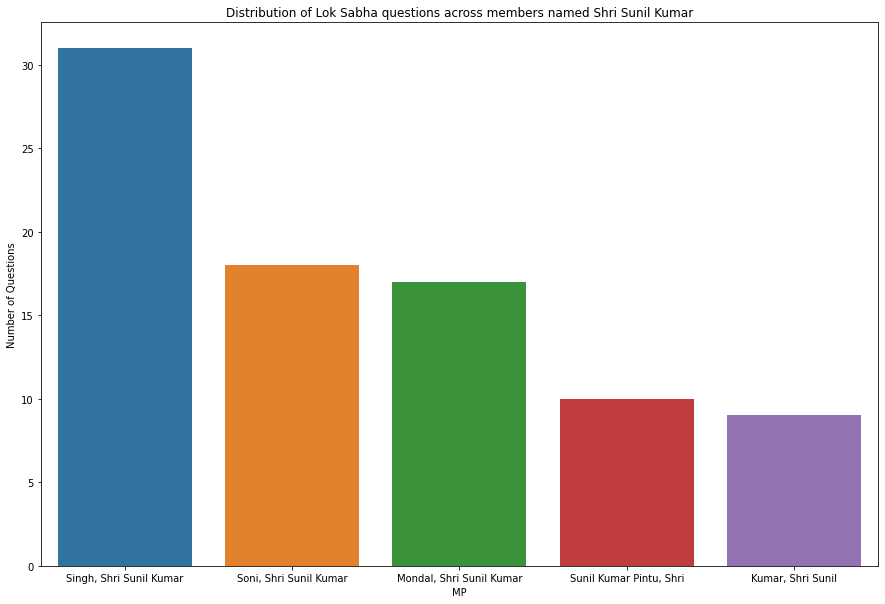

In [16]:
# Grouping these by 'from'
questions_sunil_wise = questions_sunil.groupby('from')['from'].agg(['count']).sort_values('count', ascending=False).reset_index()
questions_sunil_wise.columns = ['MP', 'Number of Questions']
plt.figure(figsize=(15, 10))
plt.title('Distribution of Lok Sabha questions across members named Shri Sunil Kumar')
sns.barplot(x='MP', y='Number of Questions', data=questions_sunil_wise)
plt.show()